In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Advertising.csv')

In [3]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


###1.data cleaning

a.check missing values

In [6]:
df.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


b.rename unamed column

In [7]:
df.rename(columns={'Unnamed: 0':'Index'})

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


###2.Exploratory Data Analysis (EDA)

.check duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

.check outliers

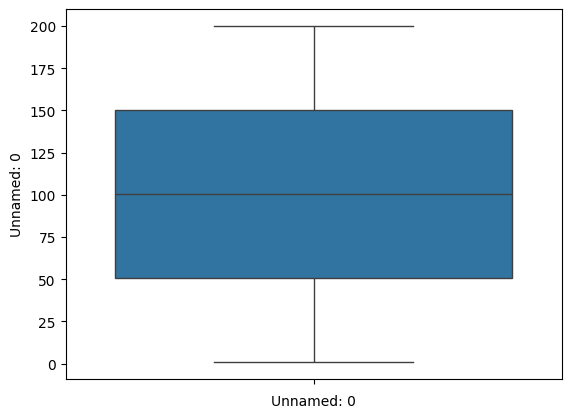

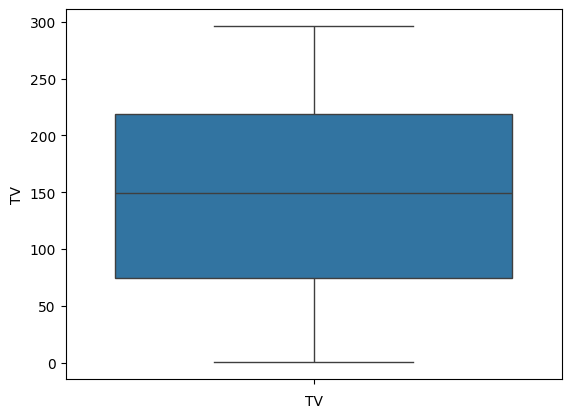

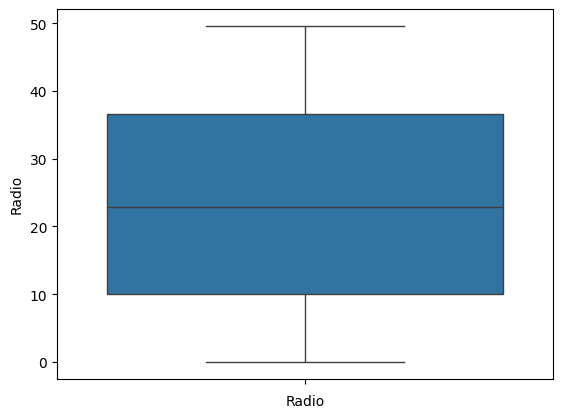

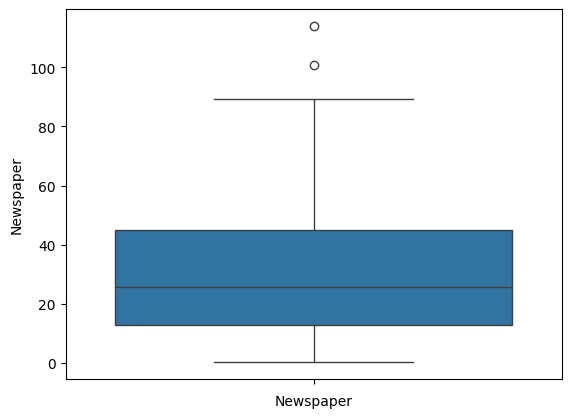

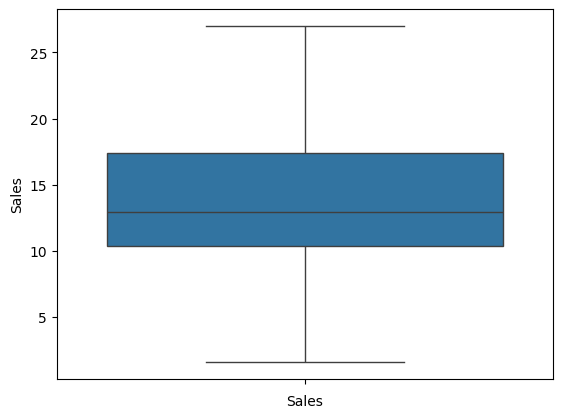

In [9]:
for col in df.columns:
   sns.boxplot(df[col])
   plt.xlabel(col)
   plt.show()

In [10]:
out_list=['Radio']
for col in out_list:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  LB=Q1-1.5*IQR
  UB=Q3+1.5*IQR
  df=df[(df[col]>=LB) & (df[col]<=UB)]

In [11]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

3.visualization

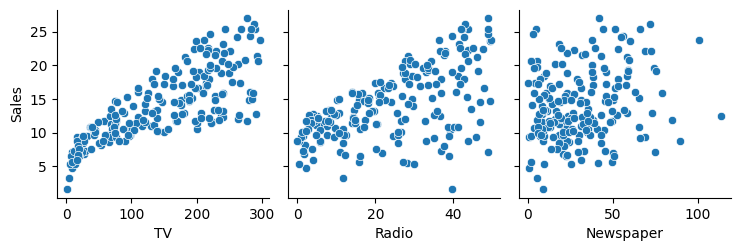

In [12]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()


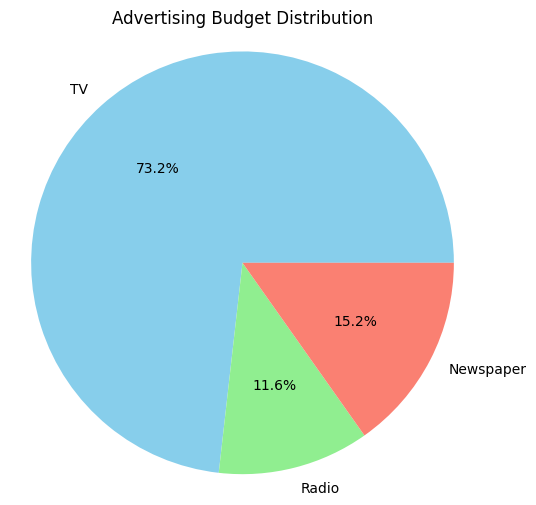

In [13]:
channel_totals = df[['TV', 'Radio', 'Newspaper']].sum()

plt.figure(figsize=(6,6))
plt.pie(channel_totals, labels=channel_totals.index, autopct='%1.1f%%',colors=['skyblue', 'lightgreen', 'salmon'])
plt.title('Advertising Budget Distribution')
plt.axis('equal')
plt.show()


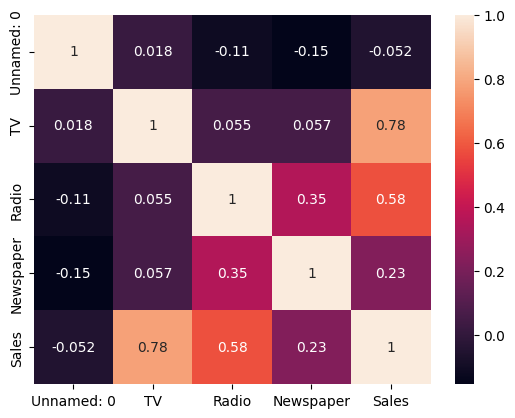

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

###4.model building

In [15]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [16]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:

from sklearn.linear_model import LinearRegression

In [20]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred1=model1.predict(x_test)

In [22]:
from sklearn.metrics import *

In [23]:
r2_score(y_test,y_pred1)*100

89.86489151417081

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [26]:
y_pred2=model2.predict(x_test)

In [27]:
r2_score(y_test,y_pred2)*100

97.8117217720178

In [28]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2)*100)

Mean Squared Error: 69.06992500000004
